### Install scikit-learn

In [1]:
## Uncomment if not installed
# !pip install -U scikit-learn

#### Verify SciKit-Learn

In [2]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
executable: C:\SOFTWARES\Anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 21.0.1
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.1
        numpy: 1.20.1
        scipy: 1.6.2
       Cython: 0.29.23
       pandas: 1.2.4
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


**Read the breast cancer dataset from sklearn as per the following details: (Hint: from sklearn.datasets import load_breast_cancer)**

i) Check the data by converting the built-in data set to a Pandas dataframe.

ii) Split the data into training and test sets (a ratio of 75:25)

iii) Build a logistic regression model on the above data

iv) Plot the ROC and calculate AUC for the training data and find the best threshold.

v) Based on this threshold, classify your test data.

vi) Also check the balancing of the dataset in terms of benign and malignant classes. Make use of oversampling technique to balance the dataset and then check the classification accuracy on the oversampled dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [4]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

sns.set()
%matplotlib inline

plt.style.use('ggplot')

pd.set_option("display.precision", 4)

In [5]:
# Breast cancer dataset for classification
data = load_breast_cancer()
print("Breast cancer dataset feature names: \n", data.feature_names)
print("Breast cancer dataset target names: \n", data.target_names)

## Checking the keys
print("The data has the following keys: \n", data.keys())

## Converting the built-in dataset to a Pandas dataframe
df = pd.DataFrame(data=data.data, columns=data.feature_names)

Breast cancer dataset feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast cancer dataset target names: 
 ['malignant' 'benign']
The data has the following keys: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
## Information about the dataset
df.info()

## Display first few rows of the dataset
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.57,17.77,132.90,1326.0,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


In [7]:
## Describing the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.1273,3.5240,6.9810,11.7000,13.3700,15.7800,28.1100
mean texture,569.0,19.2896,4.3010,9.7100,16.1700,18.8400,21.8000,39.2800
mean perimeter,569.0,91.9690,24.2990,43.7900,75.1700,86.2400,104.1000,188.5000
mean area,569.0,654.8891,351.9141,143.5000,420.3000,551.1000,782.7000,2501.0000
mean smoothness,569.0,0.0964,0.0141,0.0526,0.0864,0.0959,0.1053,0.1634
mean compactness,569.0,0.1043,0.0528,0.0194,0.0649,0.0926,0.1304,0.3454
mean concavity,569.0,0.0888,0.0797,0.0000,0.0296,0.0615,0.1307,0.4268
mean concave points,569.0,0.0489,0.0388,0.0000,0.0203,0.0335,0.0740,0.2012
mean symmetry,569.0,0.1812,0.0274,0.1060,0.1619,0.1792,0.1957,0.3040
mean fractal dimension,569.0,0.0628,0.0071,0.0500,0.0577,0.0615,0.0661,0.0974


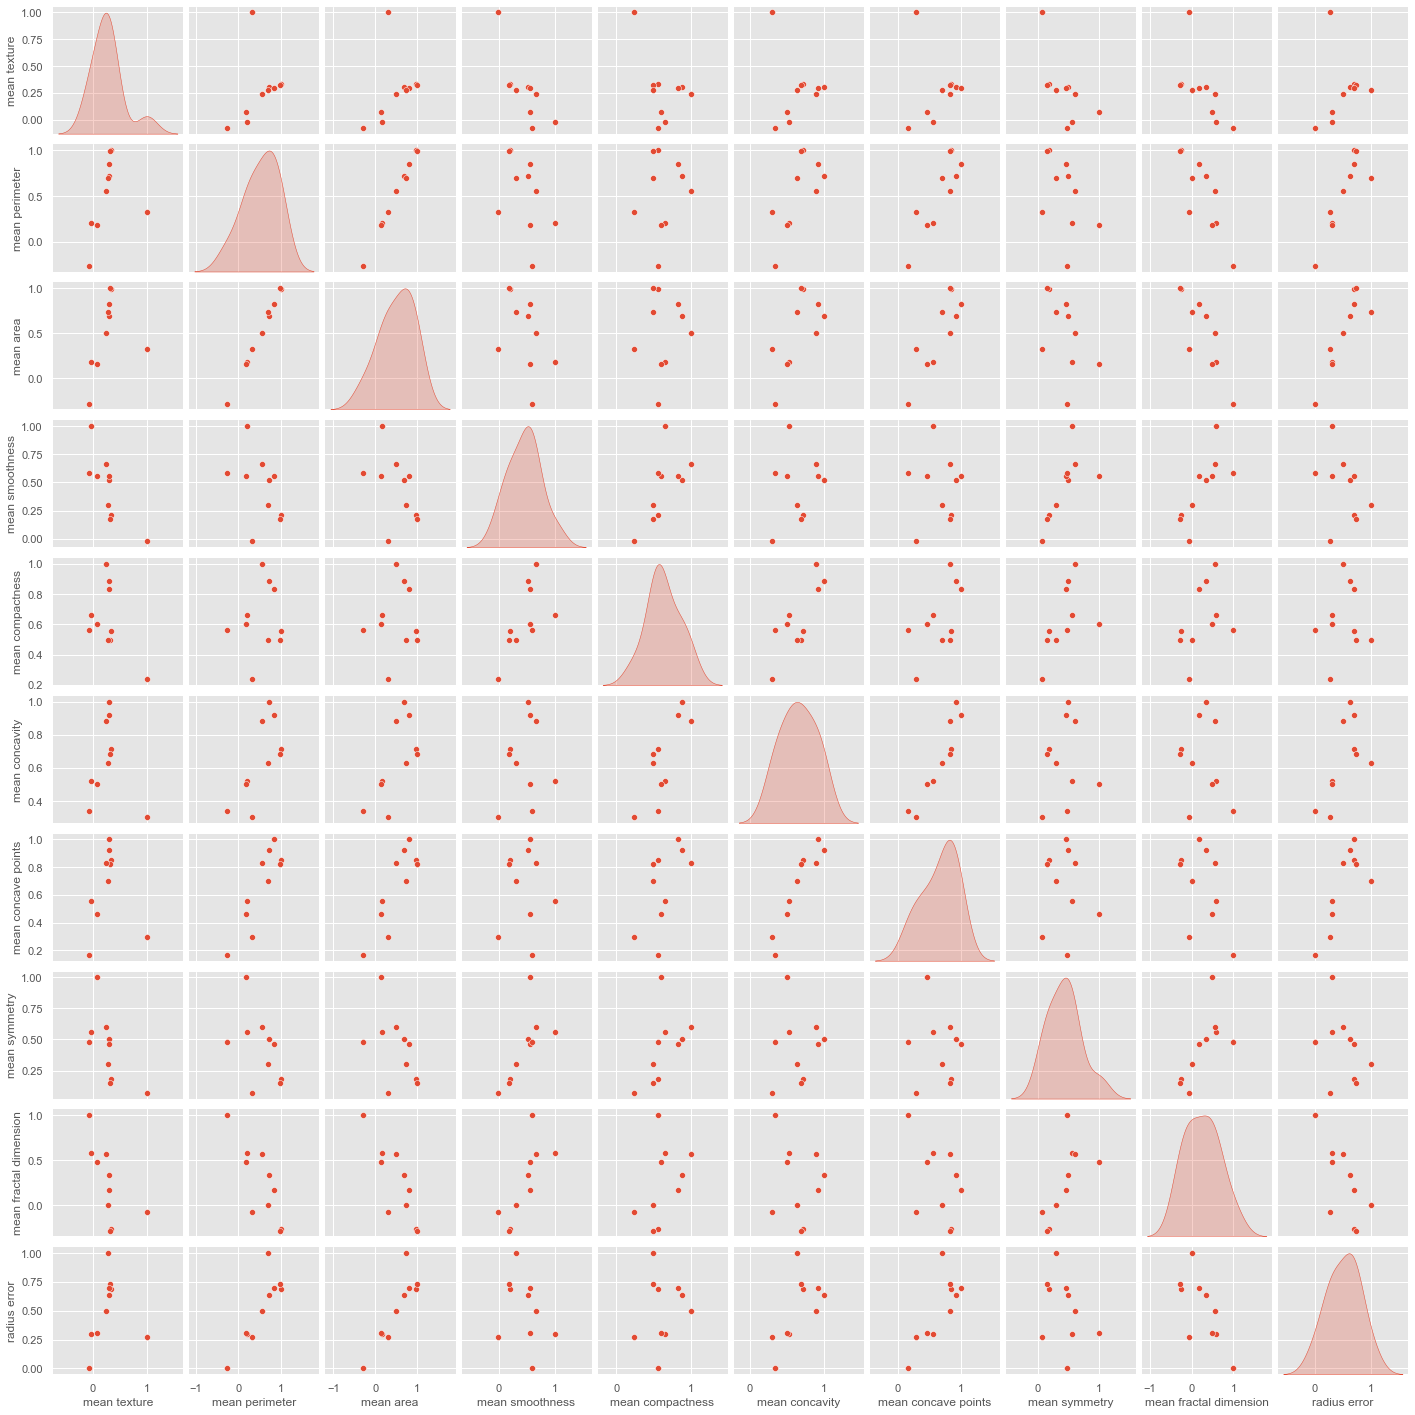

In [8]:
feature_means = list(df.columns[1:11])

## Find the correlation between columns
corr_data = df[feature_means].corr()
sns.pairplot(df[feature_means].corr(), diag_kind='kde', size=2)

> Pairplot is too big and complicated to understand. Lets try a heatmap.

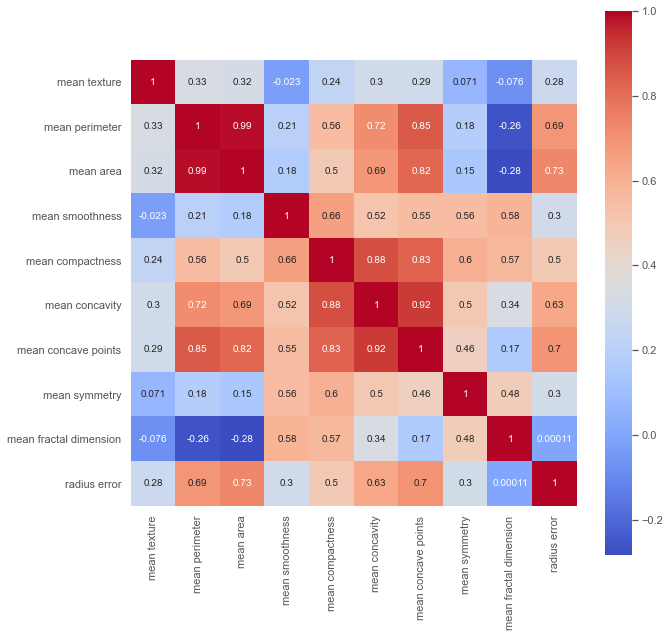

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df[feature_means].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [10]:
li_classes = [data.target_names[1], data.target_names[0]]
li_target = [1 if x==0 else 0 for x in list(data.target)]
li_ftrs = list(data.feature_names)

print("There are 2 target classes:")
print("li_classes", li_classes)
print("---")
print("Target class distribution from a total of %d target values:" % len(li_target))
print(pd.Series(li_target).value_counts())
print("---")

df_all = pd.DataFrame(data.data[:,:], columns=li_ftrs)
print("Describe dataframe, first 6 columns:")
print(df_all.iloc[:,:6].describe().to_string())

There are 2 target classes:
li_classes ['benign', 'malignant']
---
Target class distribution from a total of 569 target values:
0    357
1    212
dtype: int64
---
Describe dataframe, first 6 columns:
       mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness
count     569.0000      569.0000         569.000   569.0000         569.0000          569.0000
mean       14.1273       19.2896          91.969   654.8891           0.0964            0.1043
std         3.5240        4.3010          24.299   351.9141           0.0141            0.0528
min         6.9810        9.7100          43.790   143.5000           0.0526            0.0194
25%        11.7000       16.1700          75.170   420.3000           0.0864            0.0649
50%        13.3700       18.8400          86.240   551.1000           0.0959            0.0926
75%        15.7800       21.8000         104.100   782.7000           0.1053            0.1304
max        28.1100       39.2800        

#### Split data into 75-25 ratio for test-train sample

In [11]:
X = df_all
y = pd.Series(li_target)

X_train_0, X_test_0, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("X_train_0.shape, y_train.shape", X_train_0.shape, y_train.shape)
print("X_test_0.shape, y_test.shape", X_test_0.shape, y_test.shape)

X_train_0.shape, y_train.shape (426, 30) (426,)
X_test_0.shape, y_test.shape (143, 30) (143,)


### Feature reduction
There are various popular methods for feature reduction; the feature selection technique demonstrated here comprises two methods applied in sequence:

- Univariate feature reduction (remove low correlations with the target).

- Feature reduction based on collinearity (for each highly correlated pair, use only the feature that correlates better with the target value).

#### Create a correlation heatmap of absolute correlation scores

In [12]:
def correlation_matrix(y, X, is_plot=False):
    """
      Calculate and plot the correlation symmetrical matrix
      # Return:
      # yX - concatenated data
      # yX_corr - correlation matrix, pearson correlation of values from -1 to +1
      # yX_abs_corr - correlation matrix, absolute values
    """
    yX = pd.concat([y, X], axis=1)
    yX = yX.rename(columns={0: 'TARGET'})  # rename first column
    
    print("Function correlation_matrix: X.shape, y.shape, yX.shape:", X.shape, y.shape, yX.shape)
    print()

    # Get feature correlations and transform to dataframe
    yX_corr = yX.corr(method='pearson')

    # Convert to abolute values
    yX_abs_corr = np.abs(yX_corr) 
  
    if is_plot:
        plt.figure(figsize=(10, 10))
        plt.imshow(yX_abs_corr, cmap='RdYlGn', interpolation='none', aspect='auto')
        plt.colorbar()
        plt.xticks(range(len(yX_abs_corr)), yX_abs_corr.columns, rotation='vertical')
        plt.yticks(range(len(yX_abs_corr)), yX_abs_corr.columns);
        plt.suptitle('Pearson Correlation Heat Map (absolute values)', fontsize=15, fontweight='bold')
        plt.show()
    return yX, yX_corr, yX_abs_corr

#### Build the correlation matrix for the train data

Function correlation_matrix: X.shape, y.shape, yX.shape: (426, 30) (426,) (426, 31)



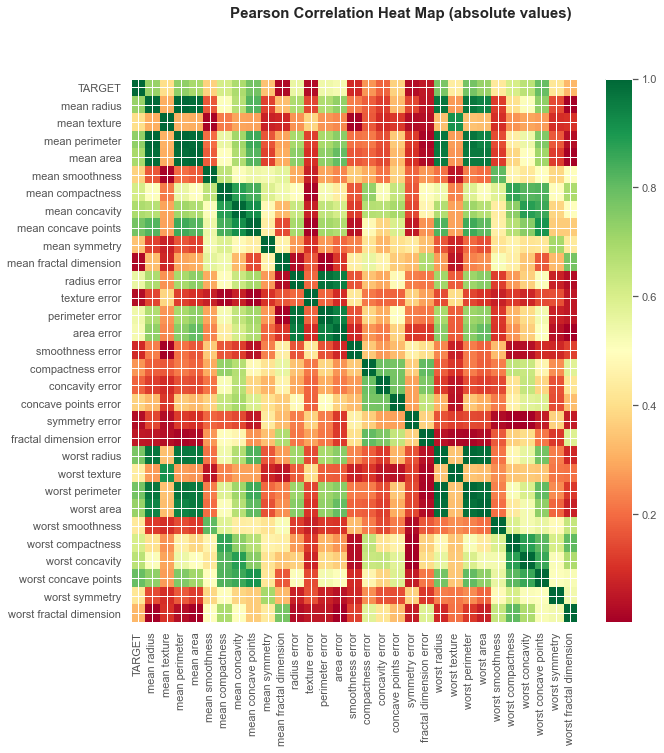

In [13]:
yX, yX_corr, yX_abs_corr = correlation_matrix(y_train, X_train_0, is_plot=True)

> Note the high correlation values between features which are directly related to each other e.g. mean radius, mean perimeter, mean area.

### Univariate feature reduction (remove low correlations with the target)

In [14]:
# Sort features by their pearson correlation with the target value
s_corr_target = yX_abs_corr['TARGET']
s_corr_target_sort = s_corr_target.sort_values(ascending=False)

# Only use features with a minimum pearson correlation with the target of 0.1
s_low_correlation_ftrs = s_corr_target_sort[s_corr_target_sort <= 0.1]

# Print
print("Removed %d low correlation features:" % len(s_low_correlation_ftrs))
for i,v in enumerate(s_low_correlation_ftrs):
    print(i, np.round(v, 4), s_low_correlation_ftrs.index[i])
  
print("---")

s_corr_target_sort = s_corr_target_sort[s_corr_target_sort > 0.1]

print("Remaining %d feature correlations:" % (len(s_corr_target_sort)-1))
for i,v in enumerate(s_corr_target_sort):
    ftr = s_corr_target_sort.index[i]
    if ftr == 'TARGET':
        continue
    print(i, np.round(v, 4), ftr)

Removed 5 low correlation features:
0 0.0898 smoothness error
1 0.0536 fractal dimension error
2 0.0329 texture error
3 0.0297 symmetry error
4 0.0234 mean fractal dimension
---
Remaining 25 feature correlations:
1 0.7954 worst concave points
2 0.7757 mean concave points
3 0.7742 worst perimeter
4 0.7685 worst radius
5 0.7325 mean perimeter
6 0.7214 worst area
7 0.7202 mean radius
8 0.6943 mean area
9 0.6861 mean concavity
10 0.6583 worst concavity
11 0.6099 mean compactness
12 0.6036 worst compactness
13 0.5555 radius error
14 0.5435 perimeter error
15 0.5253 area error
16 0.4439 worst texture
17 0.4318 worst smoothness
18 0.4254 worst symmetry
19 0.4001 mean texture
20 0.3744 mean smoothness
21 0.3743 concave points error
22 0.3428 mean symmetry
23 0.3232 worst fractal dimension
24 0.2646 compactness error
25 0.1865 concavity error


### Feature reduction based on collinearity (for each highly correlated pair of features, leave only the feature that correlates better with the target value).

In [15]:
# Remove features that have a low correlation with the target
li_X1_cols = list(set(s_corr_target_sort.index) - set(s_low_correlation_ftrs.index)) 
li_X1_cols.remove('TARGET')

# Build the correlation matrix for the reduced X
X1 = X_train_0[li_X1_cols]
yX1, yX_corr1, yX_abs_corr1 = correlation_matrix(y_train, X1, is_plot=False)  

# Get all the feature pairs
Xcorr1 = yX_abs_corr1.iloc[1:,1:]
s_pairs = Xcorr1.unstack()
print("s_pairs.shape", s_pairs.shape)
s_pairs = np.round(s_pairs, decimals=4)

# Sort all the pairs by highest correlation values
s_pairs_sorted = s_pairs.sort_values(ascending=False) 
s_pairs_sorted = s_pairs_sorted[(s_pairs_sorted != 1) & (s_pairs_sorted > 0.8)]  # leave only the top matches that are not identical features

# Convert to a list of name tuples e.g. ('mean radius', 'mean perimeter')
li_corr_pairs = s_pairs_sorted.index.tolist()

print("len(li_corr_pairs):", len(li_corr_pairs))
print("li_corr_pairs[:10]", li_corr_pairs[:10])

Function correlation_matrix: X.shape, y.shape, yX.shape: (426, 25) (426,) (426, 26)

s_pairs.shape (625,)
len(li_corr_pairs): 80
li_corr_pairs[:10] [('mean radius', 'mean perimeter'), ('mean perimeter', 'mean radius'), ('worst radius', 'worst perimeter'), ('worst perimeter', 'worst radius'), ('mean radius', 'mean area'), ('mean area', 'mean radius'), ('mean area', 'mean perimeter'), ('mean perimeter', 'mean area'), ('worst radius', 'worst area'), ('worst area', 'worst radius')]


#### For each of the highest correlated feature pairs, remove the feature that is less correlated with the target

In [16]:
li_remove_pair_ftrs = []
li_remove_scores = []
for tup in li_corr_pairs:
    s0 = s_corr_target_sort.loc[tup[0]]
    s1 = s_corr_target_sort.loc[tup[1]]
    remove_ftr = tup[1] if s1 < s0 else tup[0]  # get the feature that is less correlated with the target
    if remove_ftr not in li_remove_pair_ftrs:
        li_remove_pair_ftrs.append(remove_ftr)
        di = {'ftr_0':tup[0], 'ftr_1':tup[1], 'score_0':s0, 'score_1':s1, 'FEATURE_TO_REMOVE':remove_ftr}
        li_remove_scores.append(OrderedDict(di))

df_remove_scores = pd.DataFrame(li_remove_scores)
print("Removing %d features (see last column):" % len(li_remove_pair_ftrs))
print(df_remove_scores.to_string())
print("---")

# Remove the features that were found in the above procedure
li_X2_cols = list(set(li_X1_cols) - set(li_remove_pair_ftrs)) 
li_X2_cols.sort()

print("Remaining %d features:" % (len(li_X2_cols)))
for i,v in enumerate(s_corr_target_sort):
    ftr = s_corr_target_sort.index[i]
    
    if ftr in li_X2_cols:
        print(i, np.round(v, 4), ftr)

Removing 16 features (see last column):
                      ftr_0                ftr_1  score_0  score_1        FEATURE_TO_REMOVE
0               mean radius       mean perimeter   0.7202   0.7325              mean radius
1              worst radius      worst perimeter   0.7685   0.7742             worst radius
2               mean radius            mean area   0.7202   0.6943                mean area
3              worst radius           worst area   0.7685   0.7214               worst area
4              radius error      perimeter error   0.5555   0.5435          perimeter error
5            mean perimeter      worst perimeter   0.7325   0.7742           mean perimeter
6                area error         radius error   0.5253   0.5555               area error
7       mean concave points       mean concavity   0.7757   0.6861           mean concavity
8              mean texture        worst texture   0.4001   0.4439             mean texture
9      worst concave points  mean concav

> Note above that for the feature reduction, features that have similar predictive power are removed e.g. for this feature pair: mean radius (0.7108) vs mean perimeter (0.7240), the mean radius feature is removed.

### Plot the correlation matrix for the final dataframe columns

After the pair feature reduction, X2.shape: (426, 9)
Function correlation_matrix: X.shape, y.shape, yX.shape: (426, 9) (426,) (426, 10)

Remaining features:
TARGET                  1.0000
worst concave points    0.7954
radius error            0.5555
worst texture           0.4439
worst smoothness        0.4318
worst symmetry          0.4254
concave points error    0.3743
mean symmetry           0.3428
compactness error       0.2646
concavity error         0.1865
Name: TARGET, dtype: float64
---
After the pair feature reduction, X2.shape: (426, 9)
Function correlation_matrix: X.shape, y.shape, yX.shape: (426, 9) (426,) (426, 10)



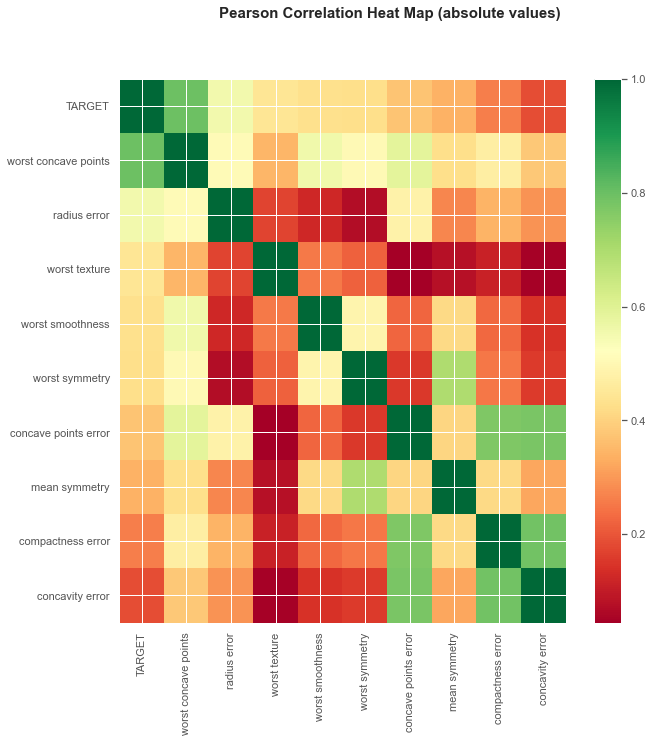

In [17]:
# Calculate correlation matrix on the subset of features
X2 = X1[li_X2_cols]
print("After the pair feature reduction, X2.shape:", X2.shape)
yX2, yX_corr2, yX_abs_corr2 = correlation_matrix(y_train, X2)

# Recalculate the correlation matrix in order to plot the TARGET values in order of correlation
s_X3_cols = yX_abs_corr2['TARGET'].sort_values(ascending=False)
li_X3_cols = s_X3_cols.index.tolist()
print("Remaining features:")
print(s_X3_cols)
print("---")
li_X3_cols.remove('TARGET')

X3 = X2[li_X3_cols]
print("After the pair feature reduction, X2.shape:", X3.shape)
yX3, yX_corr3, yX_abs_corr3 = correlation_matrix(y_train, X3, is_plot=True)

X_train = X3
X_test = X_test_0[li_X3_cols]

### Plot specific scatter matrix pair for one of the features vs the target

Text(0.5, 0.98, 'Example scatter matrix pair')

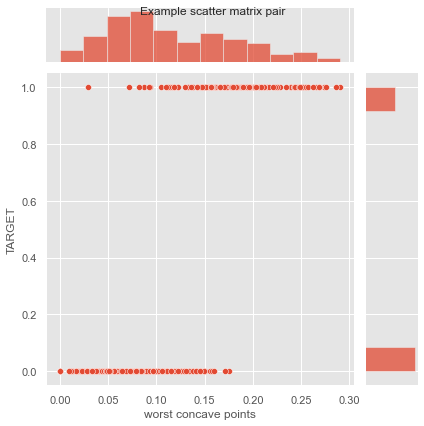

In [18]:
sns.jointplot(yX3['worst concave points'], yX3['TARGET'], kind='scatter', marginal_kws=dict(bins=12, rug=True))
plt.suptitle('Example scatter matrix pair')

> The 'worst concave points' feature shown above has a high pearson correlation with the target (0.81) and therefore we see good separation of the points that correspond to the negative class (at the bottom, where TARGET=0) vs the points that correspond to the positive class (at the top, where TARGET=1).

### Plot all the scatter matrix pairs in a single plot

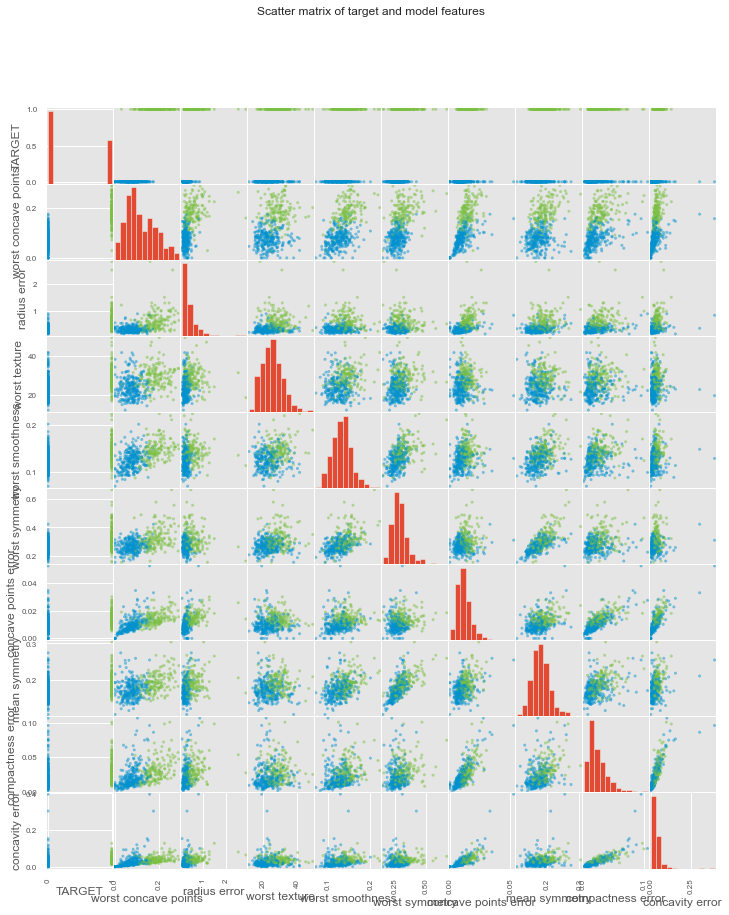

In [19]:
color_map = {0: '#0392cf', 1: '#7bc043'}  # 0 (negative class): blue, 1 (positive class): green
colors = yX3['TARGET'].map(lambda x: color_map.get(x))
pd.plotting.scatter_matrix(yX3, alpha=0.5, color=colors, figsize=(12,14), diagonal='hist', hist_kwds={'bins':12})
plt.suptitle('Scatter matrix of target and model features')
plt.show()

> Only the subset of features shown above will be used for the model. The scatter matrix helps to understand the pairwise relationships between the features. Note that the blue dots represent negative targets and the green dots represent positive targets. The diagonal contains a histogram plot per feature.

In [20]:
# Train data
print("X_train.shape, y_train.shape", X_train.shape, y_train.shape)

## Print the class distribution of the TARGET for both train and test sets
val_cnts = y_train.value_counts()
print("Class distribution of positive and negative samples in the train set:")
print(val_cnts)
print("Percentage of positive class samples: %s" % "%2f%%" % (100 * val_cnts[1] / len(y_train)))

print("---")
print("X_test.shape, y_test.shape", X_test.shape, y_test.shape)

val_cnts = y_test.value_counts()
print("Class distribution of positive and negative samples in the test set:")
print(val_cnts)
print("Percentage of positive class samples: %s" % "%2f%%" % (100 * val_cnts[1] / len(y_test)))

X_train.shape, y_train.shape (426, 9) (426,)
Class distribution of positive and negative samples in the train set:
0    267
1    159
dtype: int64
Percentage of positive class samples: 37.323944%
---
X_test.shape, y_test.shape (143, 9) (143,)
Class distribution of positive and negative samples in the test set:
0    90
1    53
dtype: int64
Percentage of positive class samples: 37.062937%


In [21]:
def plot_2d_grid_search_heatmap(grid_search, grid_params, x_param, y_param, is_verbose=True):
    '''
    Plot 2d grid search heatmap
    Parameters:
      grid_search: instance of sklearn's GridSearchCV
      grid_params: dictionary of grid search parameters  
      x_param: name of x-axis parameter in grid_params
      y_param: name of y-axis parameter in grid_params
      is_verbose (optional): print results
  
    Return:
      grid_search.best_score_: best score found
      grid_search.best_estimator_: best estimator found
    '''
    grid_params_x = grid_params[x_param]
    grid_params_y = grid_params[y_param]
    
    df_results = pd.DataFrame(grid_search.cv_results_)
    ar_scores = np.array(df_results.mean_test_score).reshape(len(grid_params_y), len(grid_params_x))
    sns.heatmap(ar_scores, annot=True, fmt='.3f', xticklabels=grid_params_x, yticklabels=grid_params_y)
    print()
    
    plt.suptitle('Grid search heatmap')
    plt.xlabel(x_param)
    plt.ylabel(y_param)
  
    if is_verbose:
        print("grid_search.best_score_:")
        print(grid_search.best_score_)
        print()
        print("grid_search.best_estimator_:")
        print(grid_search.best_estimator_)
    
    return grid_search.best_score_, grid_search.best_estimator_

### Build Logistic Regression Classifier


grid_search.best_score_:
0.948344733242134

grid_search.best_estimator_:
LogisticRegression(C=1000, class_weight='balanced', max_iter=200, n_jobs=1,
                   random_state=0)
intercept_:
[-21.71297344]

coef_:
[[ 77.22267166  16.36751549   0.27544954 -19.89124092  20.47543626
  -11.52182479 -12.57924296 -50.91019526 -14.38791952]]


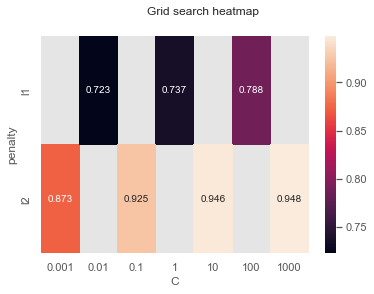

In [22]:
# Note that we will often need to normalize or standardize the data prior to doing Logistic Regression, 
# however this is not always necessary (preprocessing would have lost the direct interpretation of each feature's value)
grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
clf_lr = LogisticRegression(class_weight='balanced', dual=False, 
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          n_jobs=1, random_state=0, tol=0.0001, verbose=0, warm_start=False)

# Cross validated grid search
gs_lr = GridSearchCV(clf_lr, grid_lr, return_train_score=True)  # note that by default, 3-fold cross validation is performed

# Fit the model
gs_lr.fit(X_train, y_train)

# Plot
best_score_lr, clf_lr = plot_2d_grid_search_heatmap(gs_lr, grid_lr, 'C', 'penalty')

# Print Logistic Regression specific attributes
print("intercept_:")
print(clf_lr.intercept_ )
print()
print("coef_:")
print(clf_lr.coef_)

> In the heatmap shown above, the x-axis is for the Logistic Regression model's 'C" parameter: It is the inverse of regularization strength and must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

> Here, models with an L2 penalty (for the squared errors) perform better than models with an L1 penalty (for the absolute errors). Only the highest 'C" value in the heatmap (where almost no regularization is applied) results in an L1 score that approaches the L2 score.